# Energy in Spain: dataset

The "energy.csv" dataset contains timeseries regarding the power market in Spain.

Explanation of columns:
* datetime: moment at which the observation happened, in UTC (https://en.wikipedia.org/wiki/Coordinated_Universal_Time)
* power_demand: total consumption of electricity in MWh (MegaWatt-hours) [consumption]
* nuclear: total energy generated in nuclear power plants in MWh [power generation]
* gas: total energy generated in gas powered plants in MWh [power generation]
* solar: total energy generated in solar farms in MWh [power generation]
* hydro: total energy generated in hydro dams in MWh [power generation]
* coal: total energy generated in coal powered plants in MWh [power generation]
* wind: total energy generated in wind farms in MWh [power generation]
* spot_price: price at which the energy is sold (generation) or bought (consumption) in €/MWh [price]

### Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime
import seaborn as sns

%matplotlib inline

### Get the data as a pandas Dataframe

In [2]:
energy = pd.read_csv("energy.csv")
type(energy)

pandas.core.frame.DataFrame

In [3]:
energy.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price
0,2019-01-01T00:00:00.000+01:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88
1,2019-01-01T01:00:00.000+01:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88
2,2019-01-01T02:00:00.000+01:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00
3,2019-01-01T03:00:00.000+01:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64
4,2019-01-01T04:00:00.000+01:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85


In [4]:
energy.tail()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price
8732,2019-12-30T20:00:00.000+01:00,31160.6,7106.3,4400.0,0.1,7910.8,685.0,2013.5,47.50
8733,2019-12-30T21:00:00.000+01:00,31152.9,7106.3,4832.3,NaN,7517.6,681.0,2096.7,46.42
8734,2019-12-30T22:00:00.000+01:00,29151.0,7105.3,4467.0,NaN,7080.2,698.0,2028.3,42.76
8735,2019-12-30T23:00:00.000+01:00,26989.6,7107.2,4672.2,NaN,6716.1,626.0,2031.8,40.88
8736,2019-12-31T00:00:00.000+01:00,24350.5,7099.0,3765.9,NaN,6403.5,528.0,1927.2,37.55


### Calculate the following

#### Shape (1 p)

In [5]:
energy.shape

(8737, 9)

In [6]:
energy

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price
0,2019-01-01T00:00:00.000+01:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88
1,2019-01-01T01:00:00.000+01:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88
2,2019-01-01T02:00:00.000+01:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00
3,2019-01-01T03:00:00.000+01:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64
4,2019-01-01T04:00:00.000+01:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85
...,...,...,...,...,...,...,...,...,...
8732,2019-12-30T20:00:00.000+01:00,31160.6,7106.3,4400.0,0.1,7910.8,685.0,2013.5,47.50
8733,2019-12-30T21:00:00.000+01:00,31152.9,7106.3,4832.3,NaN,7517.6,681.0,2096.7,46.42
8734,2019-12-30T22:00:00.000+01:00,29151.0,7105.3,4467.0,NaN,7080.2,698.0,2028.3,42.76
8735,2019-12-30T23:00:00.000+01:00,26989.6,7107.2,4672.2,NaN,6716.1,626.0,2031.8,40.88


#### Create a list called "features" containing all the columns that are not "datetime" (1 p)

In [7]:
energy_cols = energy.columns

In [8]:
# using list comprehensions

features = [col for col in energy_cols if "datetime" not in col]
print(features)

['power_demand', 'nuclear', 'gas', 'solar', 'hydro', 'coal', 'wind', 'spot_price']


#### How many NaN are there in the dataset? (1 p)

In [9]:
# "Dealing with missing values" in the slides
# axis = 0 columns
# axis = 1 rows
energy.isna().sum(axis = 0)

datetime           0
power_demand       0
nuclear            0
gas                0
solar           2392
hydro              0
coal             149
wind               0
spot_price         0
dtype: int64

In [10]:
energy.isnull().sum().sum()

2541

#### Convert the "datetime" column into a Series containing datetime objects (0.5 p)

Pass utc=True as argument to your function of choice *cough* pd.to_dat... *cough*

In [11]:
energy.dtypes

datetime         object
power_demand    float64
nuclear         float64
gas             float64
solar           float64
hydro           float64
coal            float64
wind            float64
spot_price      float64
dtype: object

In [12]:
# pandas datetime functionalities
energy["datetime"] = pd.to_datetime(energy["datetime"], utc=True)

In [13]:
energy.dtypes

datetime        datetime64[ns, UTC]
power_demand                float64
nuclear                     float64
gas                         float64
solar                       float64
hydro                       float64
coal                        float64
wind                        float64
spot_price                  float64
dtype: object

#### Create the following columns (0.5 p)
* year
* month
* day
* hour
* weekday

In [14]:
# pandas datetime functionalities

energy["year"] = energy["datetime"].map(lambda x: x.year)
energy["month"] = energy["datetime"].map(lambda x: x.month)
energy["day"] = energy["datetime"].map(lambda x: x.day)
energy["hour"] = energy["datetime"].map(lambda x: x.hour)
energy["weekday"] = energy["datetime"].map(lambda x: x.weekday()+1)

In [15]:
energy.describe()

,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday
count,8737.000000,8737.000000,8737.000000,6345.000000,8737.000000,8588.000000,8737.000000,8737.000000,8737.000000,8737.000000,8737.000000,8737.000000,8737.000000
mean,28512.653474,6381.835069,5924.323967,1399.224240,2803.288108,1263.865137,6072.172588,47.705993,2018.999886,6.511617,15.680325,11.501316,3.999657
std,4566.831233,825.163584,3180.671191,1334.539134,1609.319482,1312.005015,3497.963836,10.882271,0.010698,3.441110,8.773269,6.923280,2.000258
min,16969.100000,3948.400000,388.900000,0.100000,443.300000,50.000000,353.000000,0.030000,2018.000000,1.000000,1.000000,0.000000,1.000000
25%,24662.600000,5963.100000,3255.800000,13.200000,1602.000000,515.000000,3363.600000,42.010000,2019.000000,4.000000,8.000000,6.000000,2.000000
50%,28763.700000,6908.000000,5739.400000,1160.800000,2401.700000,765.000000,5300.900000,48.990000,2019.000000,7.000000,16.000000,12.000000,4.000000
75%,31980.800000,7015.600000,8400.100000,2636.700000,3605.700000,1262.375000,8178.500000,54.540000,2019.000000,10.000000,23.000000,18.000000,6.000000
max,40094.800000,7129.100000,15082.300000,4213.100000,8346.600000,6327.900000,17768.700000,74.740000,2019.000000,12.000000,31.000000,23.000000,7.000000


#### Create a "weekend" column containing True if day is Sat/Sun or False if day is Mon/Tue/... (1 p)

In [16]:
# feature engineering
# use your already beloved (map + lambda functions)
# or list comprehensions
energy["weekend"] = np.where(energy["weekday"] < 5, False, True)

In [17]:
energy

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday,weekend
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,12,31,23,1,False
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,1,1,0,2,False
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,1,1,1,2,False
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,1,1,2,2,False
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,1,1,3,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8732,2019-12-30 19:00:00+00:00,31160.6,7106.3,4400.0,0.1,7910.8,685.0,2013.5,47.50,2019,12,30,19,1,False
8733,2019-12-30 20:00:00+00:00,31152.9,7106.3,4832.3,NaN,7517.6,681.0,2096.7,46.42,2019,12,30,20,1,False
8734,2019-12-30 21:00:00+00:00,29151.0,7105.3,4467.0,NaN,7080.2,698.0,2028.3,42.76,2019,12,30,21,1,False
8735,2019-12-30 22:00:00+00:00,26989.6,7107.2,4672.2,NaN,6716.1,626.0,2031.8,40.88,2019,12,30,22,1,False


#### Calculate the average values per weekday for the columns in "features" list (1 p)

In [18]:
# features is the list you created in the beginning
energy.groupby("weekday").mean()[features]

,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price
weekday,,,,,,,,
1,29207.582306,6390.911769,6483.540032,1382.902420,2919.916173,1282.017737,5846.823379,49.239688
2,29760.259375,6391.128526,6716.402003,1400.603377,2870.550401,1478.384477,5795.669712,50.202580
3,29814.897436,6399.605689,6448.102244,1386.101098,2856.419471,1444.195997,6451.173798,48.811442
4,29913.133253,6408.186458,6404.798397,1396.425420,2904.324439,1364.827287,6452.391747,48.817388
5,29587.505689,6404.227003,6362.183894,1437.464229,3027.978526,1294.994618,6071.198638,48.785793
6,26545.257933,6325.359535,4965.318109,1418.782988,2604.202644,1057.801583,5826.916346,45.429864
7,24759.381490,6353.419231,4089.475000,1373.876790,2439.531651,912.083292,6061.215064,42.653966


#### Create a function that returns the season out of a datetime object (0.5 p)
Use that function to create a "season" column

In [19]:
# get_season function

from datetime import date

def get_season(date_to_convert):  # the function expects a datetime.date object as input
    year = date_to_convert.year
    
    seasons = [
        ("winter", date(year, 12, 21), date(year, 12, 31)),
        ("spring", date(year, 3, 20), date(year, 6, 21)),
        ("summer", date(year, 6, 22), date(year, 9, 21)),
        ("fall", date(year, 9, 22), date(year, 12, 20)),
        ("winter", date(year, 1, 1), date(year, 3, 19))
    ]
    
    # loop for each season trying to find the season to which
    # date_to_convert belongs to
    for elem in seasons:  # season = tuple(name, start, end) = (elem[0], elem[1], elem[2])
        if date_to_convert>=elem[1] and date_to_convert<=elem[2]:  
            return elem[0]
        
energy["season"] = energy["datetime"].map(get_season)

In [20]:
energy

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday,weekend,season
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,12,31,23,1,False,winter
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,1,1,0,2,False,winter
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,1,1,1,2,False,winter
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,1,1,2,2,False,winter
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,1,1,3,2,False,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8732,2019-12-30 19:00:00+00:00,31160.6,7106.3,4400.0,0.1,7910.8,685.0,2013.5,47.50,2019,12,30,19,1,False,winter
8733,2019-12-30 20:00:00+00:00,31152.9,7106.3,4832.3,NaN,7517.6,681.0,2096.7,46.42,2019,12,30,20,1,False,winter
8734,2019-12-30 21:00:00+00:00,29151.0,7105.3,4467.0,NaN,7080.2,698.0,2028.3,42.76,2019,12,30,21,1,False,winter
8735,2019-12-30 22:00:00+00:00,26989.6,7107.2,4672.2,NaN,6716.1,626.0,2031.8,40.88,2019,12,30,22,1,False,winter


In [21]:
energy["season"].describe()

count       8737
unique         4
top       spring
freq        2256
Name: season, dtype: object

#### Calculate average demand and spot_price for each season (1 p)

In [22]:
energy.groupby("season").mean()[["power_demand","spot_price"]]

,power_demand,spot_price
season,,
fall,28242.443241,43.562639
spring,27157.150399,48.790598
summer,29235.177536,46.509909
winter,29481.103975,52.033360


#### Why are there so many NaN values in the "solar" column? (0.5 p - extra)

In [23]:
energy["solar"].isnull().sum()

2392

The reason for the NaN values could be the direct dependance to the weather, and not the energy market evolution.

If the day the data was gathered, there was not any sun, there could not have been any solar energy registered. 

#### Calculate the total income for each type of power generation and total costs for consumption (4 p) 
Return a dictionary like the following one:

{ "consumption": cost_consumption, "wind": income_wind, "solar": income_solar, "gas": income_gas, ...} 

In [24]:
# Income = energy_generated * price
# Cost = energy_bought * price

In [25]:
dict_energy = {}
features_new = [feature for feature in features if feature != "spot_price"]

for col in features_new:
    dict_energy[col] = np.sum(energy[col] * energy["spot_price"])


In [26]:
dict_energy

{'power_demand': 12115827296.223999,
 'nuclear': 2674992442.1679997,
 'gas': 2577997502.639,
 'solar': 430157479.785,
 'hydro': 1179143190.696,
 'coal': 591516973.36,
 'wind': 2412917661.565}

#### Create two plots: (2 p)
* Hourly average power demand
* Hourly average spot price

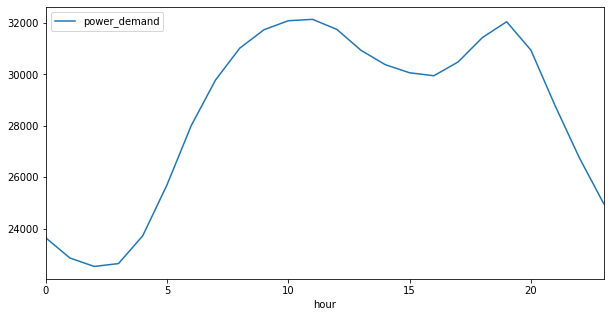

In [33]:
energy.groupby("hour").mean()[["power_demand"]].plot(figsize=(10, 5))

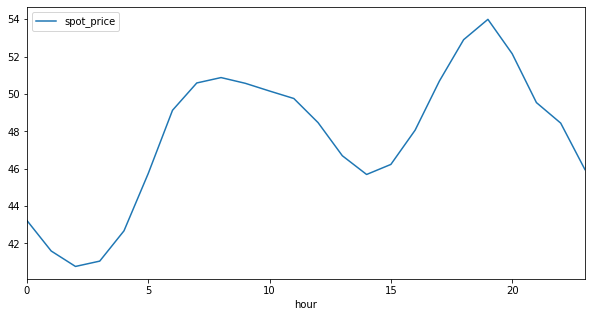

In [34]:
energy.groupby("hour").mean()[["spot_price"]].plot(figsize=(10, 5))

#### Create a categorical variable called "wind_category" using the "wind" column (2 p)
Create 3 categories: low, mid, high

In [35]:
energy["wind_category"] = pd.cut(
    energy["wind"],
    bins=3,
    labels=["low", "mid", "high"]
)

energy.sample(5)

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday,weekend,season,wind_category
4277,2019-06-28 04:00:00+00:00,26985.9,6540.5,9517.0,12.6,1831.9,520.0,2157.8,51.20,2019,6,28,4,5,True,summer,low
8243,2019-12-10 10:00:00+00:00,35001.0,5975.8,8669.6,3232.3,5478.8,1089.8,5697.7,49.90,2019,12,10,10,2,False,fall,low
2271,2019-04-05 14:00:00+00:00,31473.6,6046.1,4669.8,1624.3,2072.0,1326.6,8945.0,50.77,2019,4,5,14,5,True,spring,mid
5946,2019-09-05 17:00:00+00:00,32213.5,6921.2,5847.9,766.5,1990.8,270.0,11125.7,40.14,2019,9,5,17,4,False,summer,mid
6751,2019-10-09 06:00:00+00:00,29094.8,5950.6,9453.3,164.1,1561.6,1107.0,3270.9,52.73,2019,10,9,6,3,False,fall,low


#### Which is the power generation type that has generated the most energy? And the least? (2 p)

In [36]:
power_generator = ["nuclear", "gas", "solar", "hydro", "coal", "wind"]

In [39]:
energy[power_generator].sum().sort_values(ascending=False)

nuclear    55758093.0
wind       53052571.9
gas        51760818.5
hydro      24492328.2
coal       10854073.8
solar       8878077.8
dtype: float64

- The power generation that has generated the most energy = nuclear energy
- The power generation that has generated the least energy = solar energy